<a href="https://colab.research.google.com/github/ACoolA-008/Data_Science_Projects/blob/main/Deep%20Learning%20Projects/C5.%20Autoencoders/Removing_Noise_from_Images_Using_Autoencoders_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

training_set, testing_set = mnist.load_data()
X_train, y_train = training_set
X_test, y_test = testing_set

11490434/11490434 [==============================] - 1s 0us/step


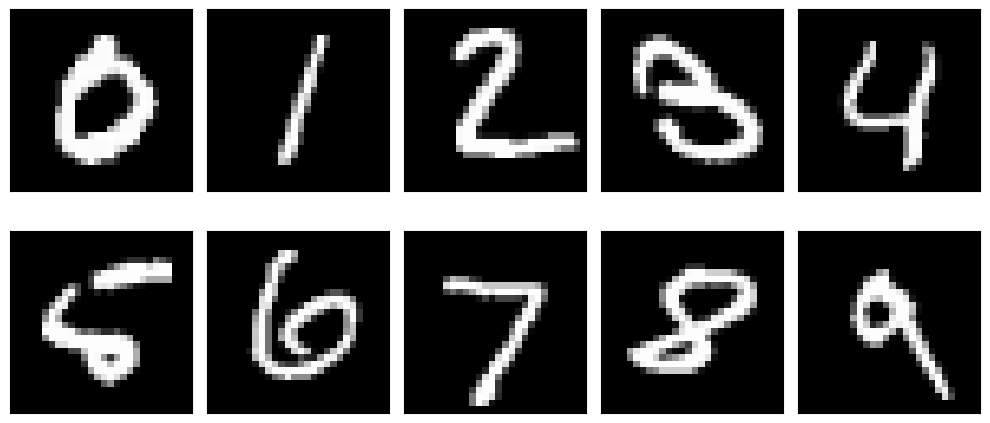

In [ ]:
# Visualize the image data

from matplotlib import pyplot as plt

# Making a grid to show images in a format of 2 rows by 5 columns with 10 x 5 figsize
fig, ((ax1, ax2, ax3, ax4, ax5),(ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(10,5))

for idx, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
  for i in range(100):
    if y_test[i] == idx:
      ax.imshow(X_test[i], cmap='gray')
      ax.grid(False)
      ax.set_xticks([])
      ax.set_yticks([])
      break
plt.tight_layout()
plt.show()

In [ ]:
# We can tell that the handwritten digits are by size 28 x 28
# The autoencoders can learn a compressed version in smaller size
# and to reproduce the images with the compressed version.

In [ ]:
# the latent representation should be in samller size than the input data
# so that it ensures only the salient features are captured.

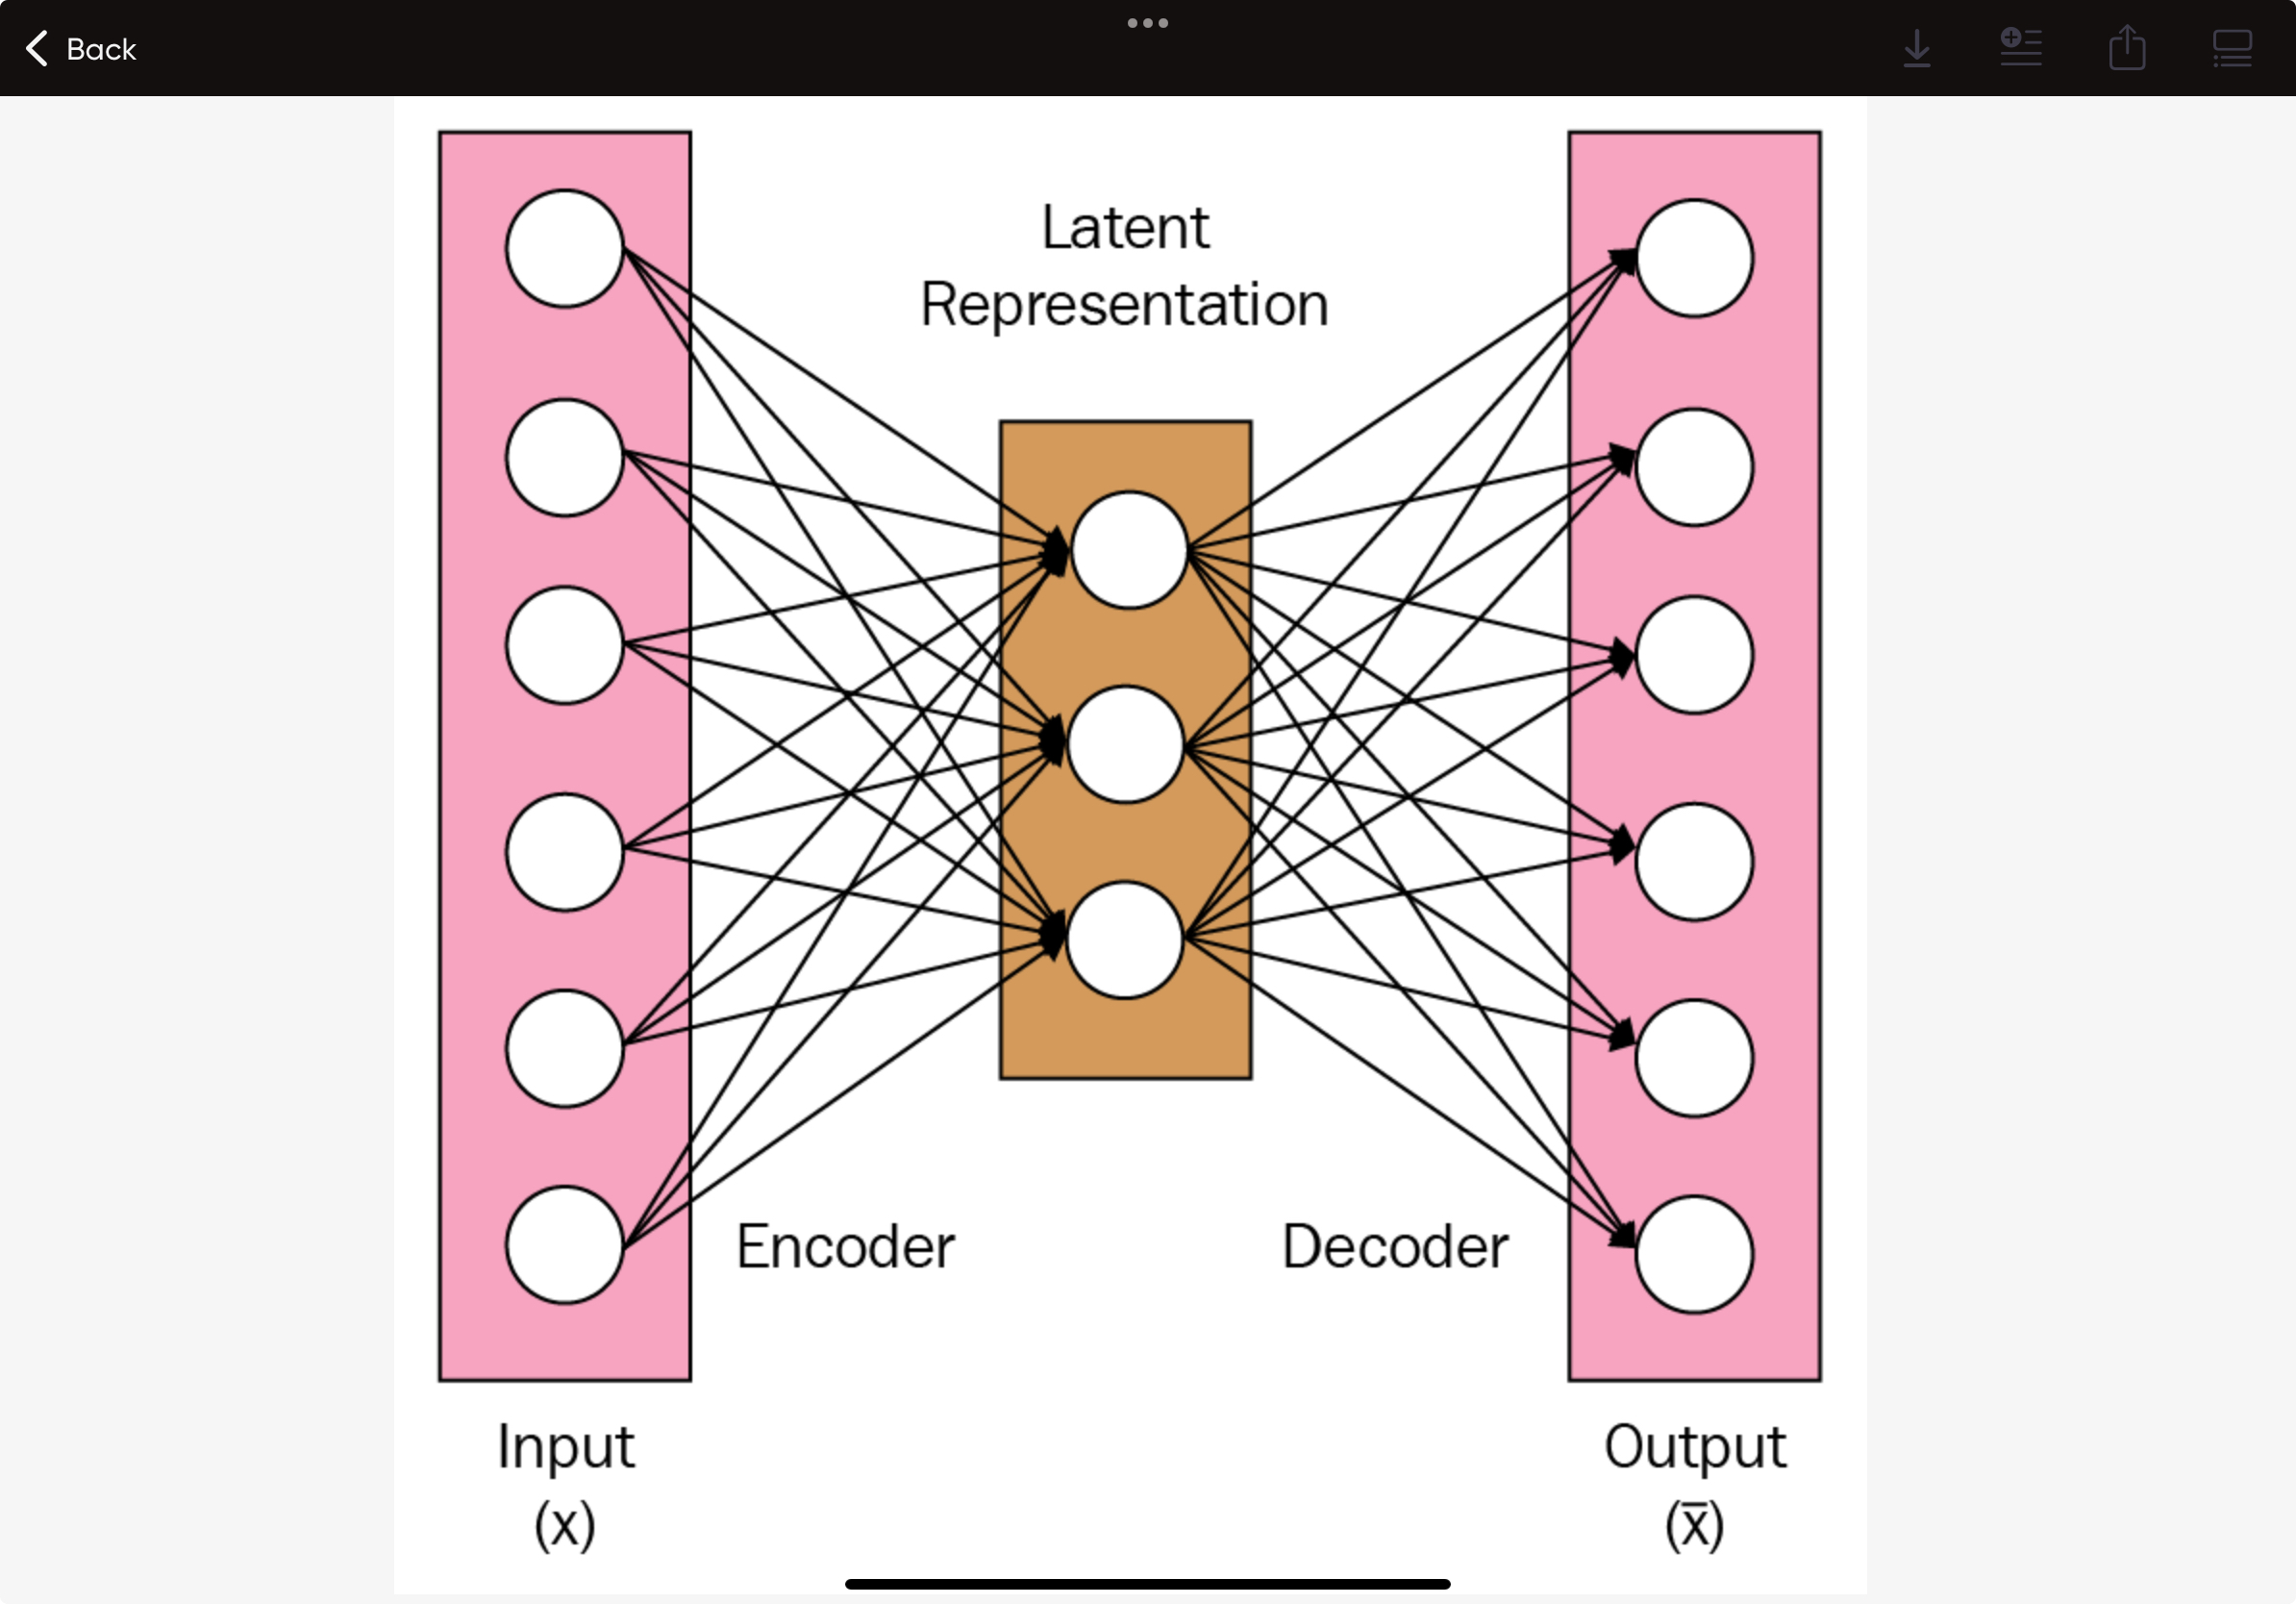

Buld the Autoencoders

In [ ]:
from keras.models import Sequential
model = Sequential()

In [ ]:
# Add a hidden layer
# It should be fully connected layer

from keras.layers import Dense

hidden_layer_size = 1
model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu')) # input_shape = 28 x 28 = 784


In [ ]:
# Add an output layer
# It should also be a fully connected layer
# The output size should be 784 as we're going to output the orinial image with a size of 28 x 28

model.add(Dense(units=784, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_1 (Dense)             (None, 784)               1568      
                                                                 
Total params: 2353 (9.19 KB)
Trainable params: 2353 (9.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def create_basic_autoencoder(hidden_layer_size):
  model = Sequential()
  model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))

  model.add(Dense(units=784, activation='sigmoid'))
  return model

model = create_basic_autoencoder(hidden_layer_size)

Data Preprocessing

X_train: This is a 3D NumPy array, typically representing a collection of images. It might have dimensions like (num_samples, height, width), where num_samples is the number of images, and height and width are the dimensions of each image. \
X_train.shape[0]: This gives the number of samples or images in the dataset. \
X_train.shape[1]: This gives the height of each image.\
X_train.shape[2]: This gives the width of each image.\
X_train.shape[1]*X_train.shape[2]: This calculates the total number of elements in each image, effectively flattening each image into a 1D array.\
X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2])): This reshapes the original 3D array into a 2D array. The resulting shape will be (num_samples, height * width).


For example, if X_train has dimensions (1000, 28, 28) (indicating 1000 images, each of size 28x28), after reshaping, X_train_reshaped will have dimensions (1000, 784).


In [ ]:
# 1. Reshape the images from 28 x 28 to 784 x 1

# Reshape X_train
X_train_reshaped = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
# Reshape X_test
X_test_reshaped = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

In [ ]:
# 2. Normalize the input values (transform pixel values from a range of 0-255 to a range of 0-1)

X_train_reshaped = X_train_reshaped / 255.
X_test_reshaped = X_test_reshaped / 255.

Training the model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting X_train_reshaped as both input(x) and output(y)
# because we train the autoencoder to reconstruct the output that's identical to the original input.
model.fit(X_train_reshaped, X_train_reshaped, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0759
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0653
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0641
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0635
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0632
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0629
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0625
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0620
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0613


In [ ]:
# Use the autoencoder model to make predictions

output = model.predict(X_test_reshaped)

313/313 [==============================] - 1s 2ms/step


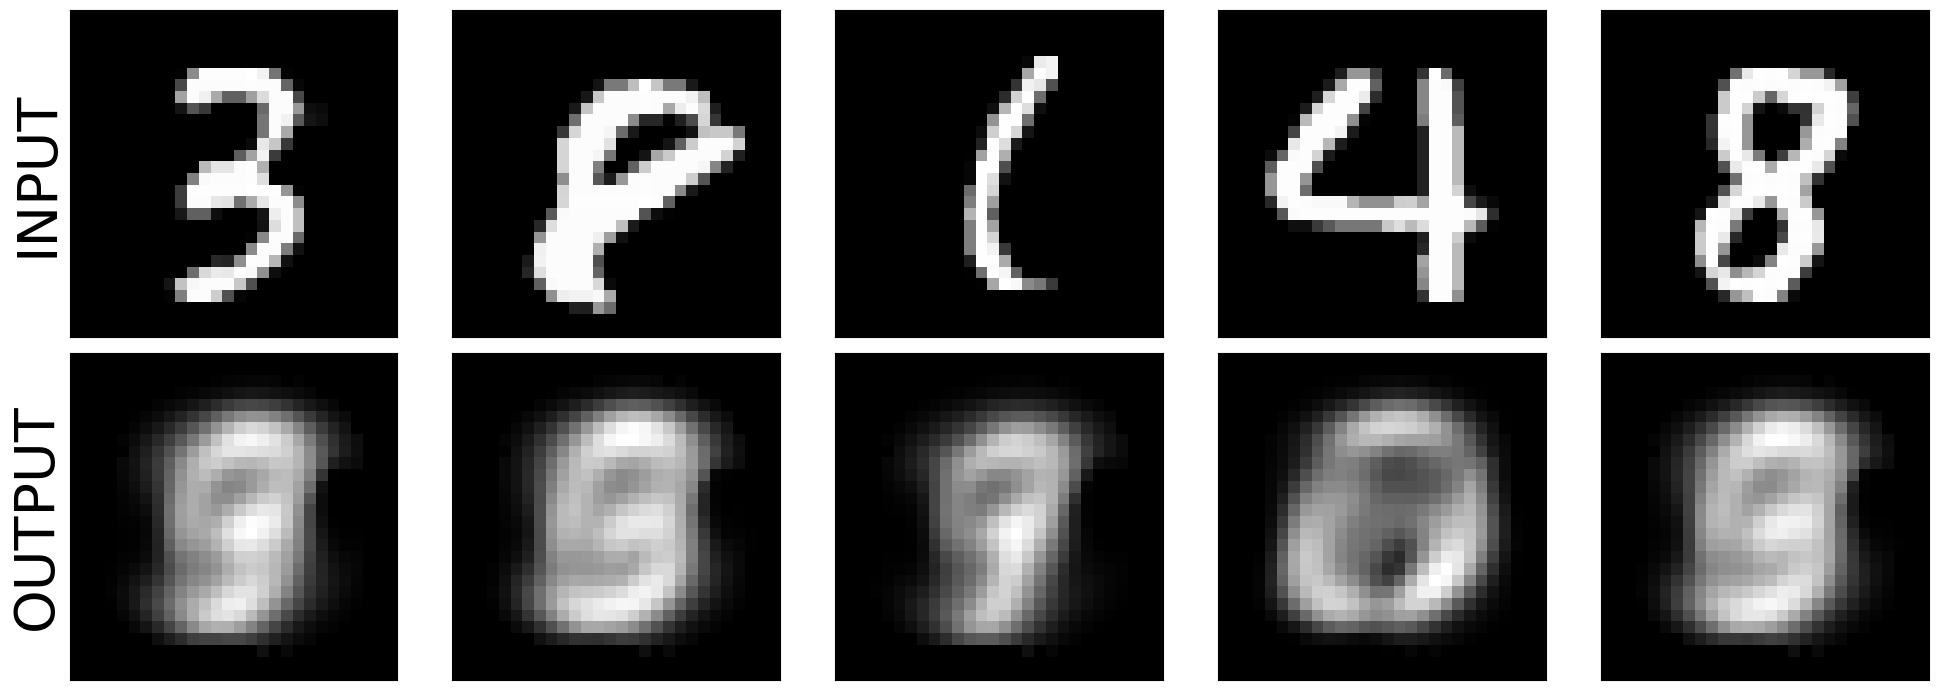

In [ ]:
# select 5 random images from the test set

import random

# Making a grid to show images in a format of 2 rows by 5 columns with 10 x 5 figsize
fig, ((ax1, ax2, ax3, ax4, ax5),(ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(20,7))

randomly_selected_images = random.sample(range(output.shape[0]),5)

# plot the original images
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
  ax.imshow(X_test[randomly_selected_images[i]], cmap='gray')
  if i == 0:
    ax.set_ylabel("INPUT", size=40)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# plot the output images made from the autoencoder model
for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
  ax.imshow(output[randomly_selected_images[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("OUTPUT", size=40)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# Display the input and output images
# We should expect a poor performance from an autoencoder model with only 1 hidden layer / latent representation

plt.tight_layout()
plt.show()

Visualize how the number of hidden layers affect the performance of the autoencoder network

In [ ]:
# Model with 2 hidden layers
hiddenLayerSize_2_model = create_basic_autoencoder(hidden_layer_size=2)
# Model with 4 hidden layers
hiddenLayerSize_4_model = create_basic_autoencoder(hidden_layer_size=4)
# Model with 8 hidden layers
hiddenLayerSize_8_model = create_basic_autoencoder(hidden_layer_size=8)
# Model with 16 hidden layers
hiddenLayerSize_16_model = create_basic_autoencoder(hidden_layer_size=16)
# Model with 32 hidden layers
hiddenLayerSize_32_model = create_basic_autoencoder(hidden_layer_size=32)

In [ ]:
# Training the 5 different models

# Train Model with 2 hidden layers
hiddenLayerSize_2_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_2_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

# Train Model with 4 hidden layers
hiddenLayerSize_4_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_4_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

# Train Model with 8 hidden layers
hiddenLayerSize_8_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_8_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

# Train Model with 16 hidden layers
hiddenLayerSize_16_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_16_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

# Train Model with 32 hidden layers
hiddenLayerSize_32_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_32_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

In [ ]:
# Predicting with the 5 different models

# Predict the output from the Model with 2 hidden layers
output_2_model = hiddenLayerSize_2_model.predict(X_test_reshaped)

# Predict the output from the Model with 4 hidden layers
output_4_model = hiddenLayerSize_4_model.predict(X_test_reshaped)

# Predict the output from the Model with 8 hidden layers
output_8_model = hiddenLayerSize_8_model.predict(X_test_reshaped)

# Predict the output from the Model with 16 hidden layers
output_16_model = hiddenLayerSize_16_model.predict(X_test_reshaped)

# Predict the output from the Model with 32 hidden layers
output_32_model = hiddenLayerSize_32_model.predict(X_test_reshaped)

313/313 [==============================] - 1s 1ms/step


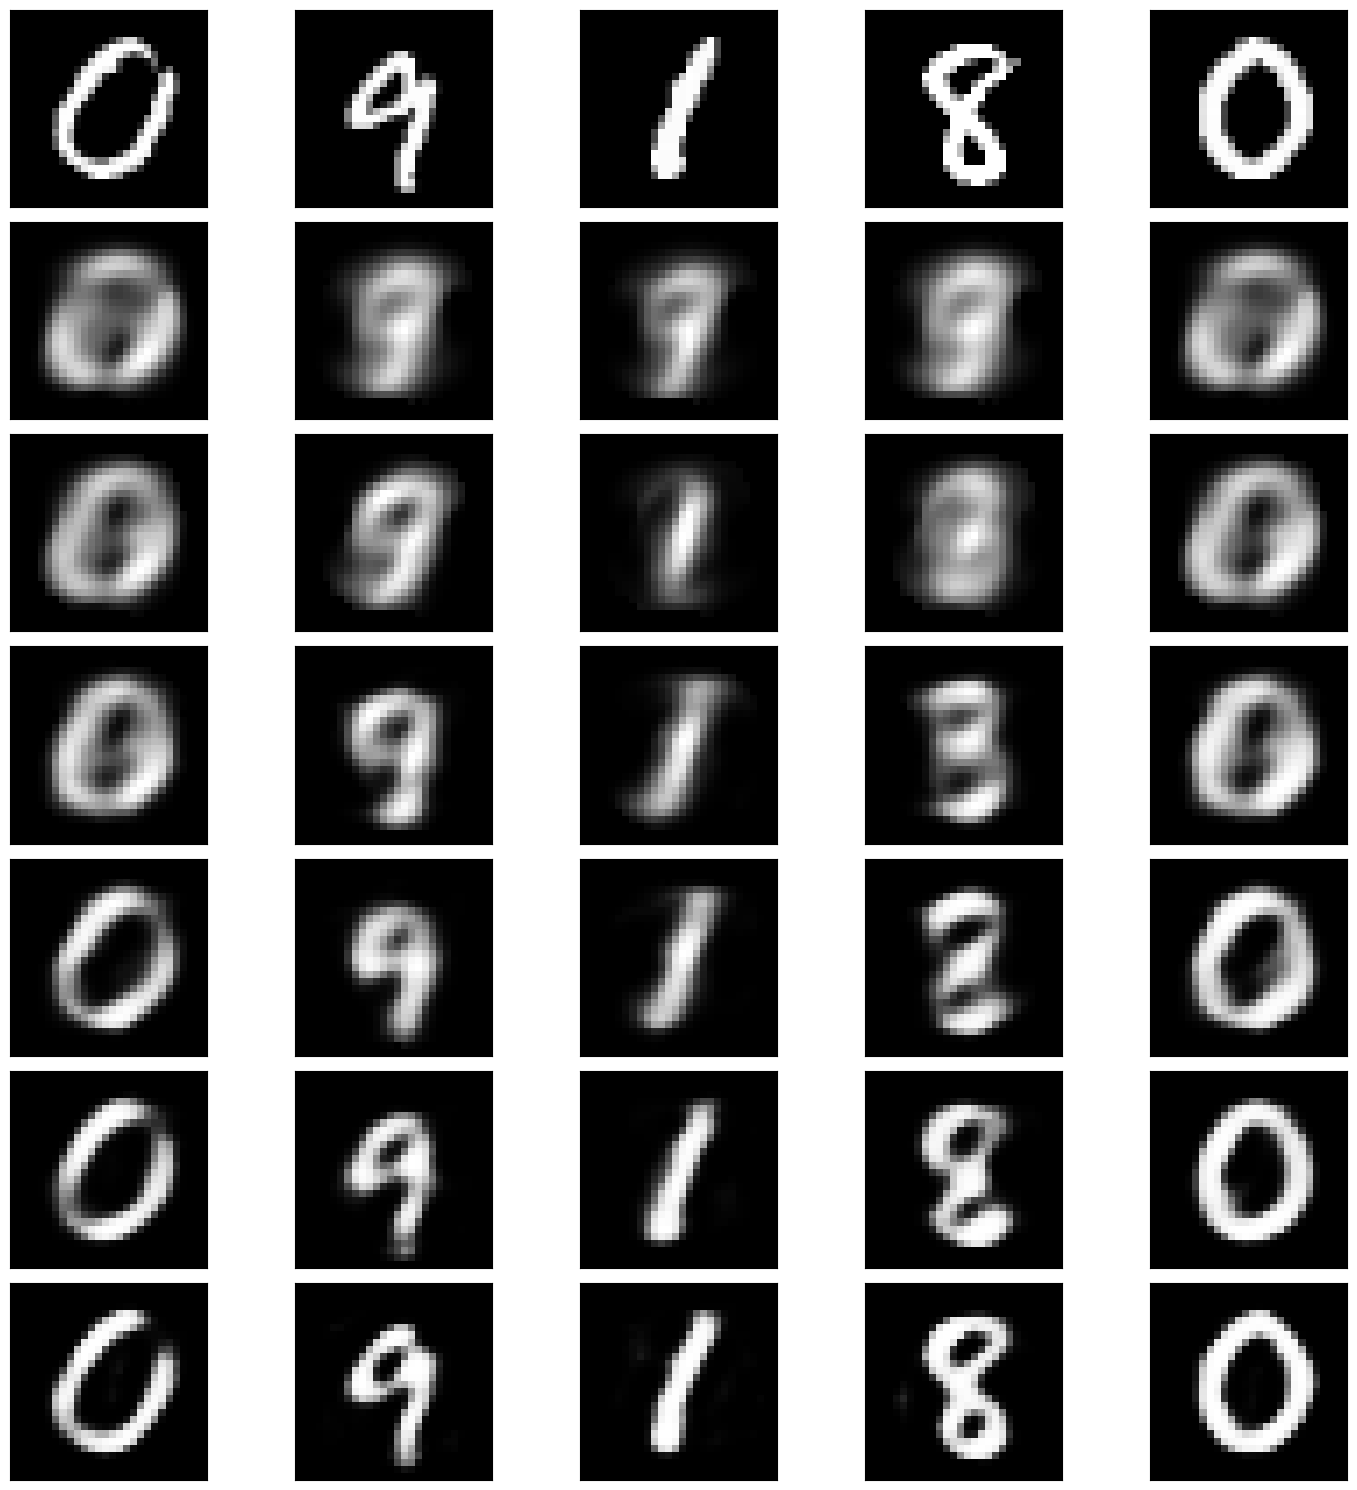

In [ ]:
# Plot and Compare the Results

# Construct a 7 rows by 5 columns grid
fig, axes = plt.subplots(7,5,figsize=(15,15))

# Randomly select 5 samples from the total number of input images
randomly_selected_images = random.sample(range(output.shape[0]),5)

outputs = [X_test, output, output_2_model, output_4_model, output_8_model, output_16_model, output_32_model]

titles = ["Original Input", "Hidden layer size 1 ouput", "Hidden layer size 2 ouput", "Hidden layer size 4 ouput", "Hidden layer size 8 ouput", "Hidden layer size 16 ouput", "Hidden layer size 32 ouput" ]

# Making plots
for row_num, row in enumerate(axes):
  for col_num, ax in enumerate(row):
    # if i == 0:
    #   ax.set_ylabel(str(titles[i]), size=40)
    ax.imshow(outputs[row_num][randomly_selected_images[col_num]].reshape(28,28), cmap='gray')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

Denoising with Autoencoders

In [ ]:
# Add 0.5 noise to every pixel value

import numpy as np

X_train_noisy = X_train_reshaped + np.random.normal(0,0.5,size=X_train_reshaped.shape)

X_test_noisy = X_test_reshaped + np.random.normal(0,0.5,size=X_test_reshaped.shape)


In [ ]:
# clip the noisy images between 0 and 1
# Given an interval, values outside the interval are clipped to
# the interval edges.  For example, if an interval of [0, 1]
# is specified, values smaller than 0 become 0, and values larger
# than 1 become 1.


X_train_noisy = np.clip(X_train_noisy, a_min=0, a_max=1)

X_test_noisy = np.clip(X_test_noisy, a_min=0, a_max=1)


In [ ]:
# create a basic denoise autoencoder with 16 hidden layers
basic_denoise_autoencoder = create_basic_autoencoder(hidden_layer_size=16)

# compile the desnoise autoencoder
basic_denoise_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# train the denoise autoencoder
basic_denoise_autoencoder.fit(X_train_noisy, X_train_reshaped, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0474
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0300
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0291
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0288
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0287
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0286
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0285
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0284
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0283
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282


In [ ]:
# Making predictions with the basic denoise autoencoder network
output = basic_denoise_autoencoder.predict(X_test_noisy)


313/313 [==============================] - 1s 2ms/step


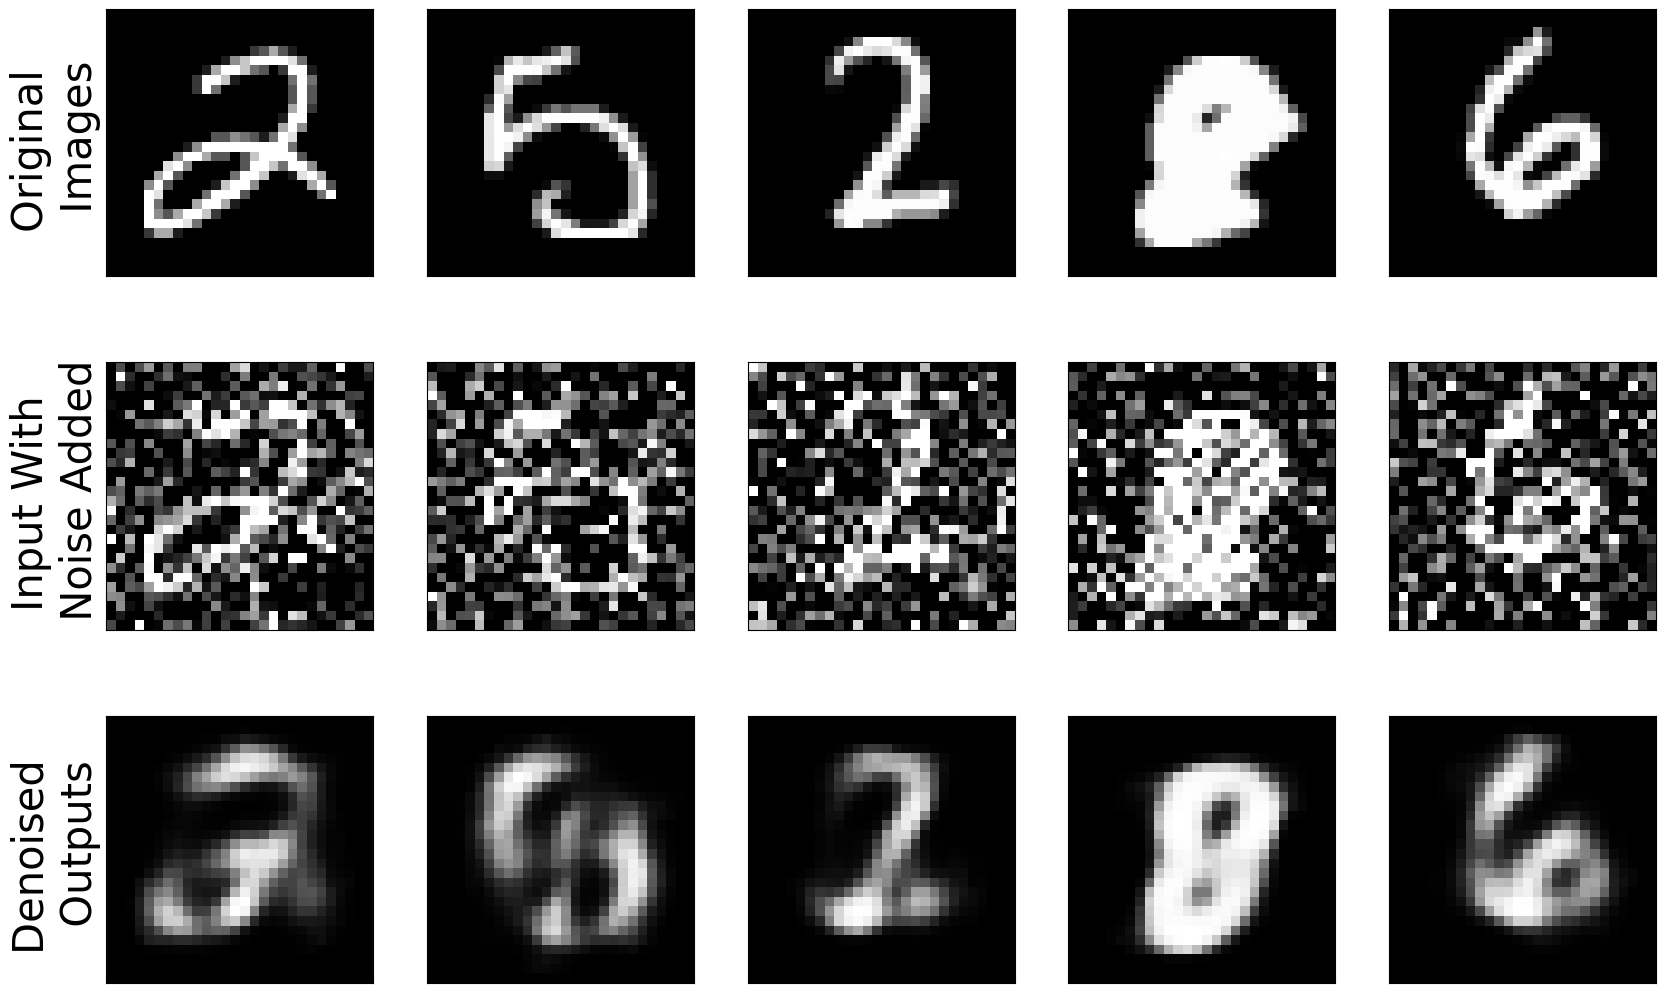

In [ ]:
# Plot the outputs from the same autoencoder with original input images and noisy input images


# Create a grid to show images in 3 x 5 format
fig, ((ax1,ax2,ax3,ax4,ax5), (ax6,ax7,ax8,ax9,ax10), (ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3,5,figsize=(20,13))
# randomly select 5 images
randomly_selected_images = random.sample(range(output.shape[0]),5)

# Display the original images
for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
  ax.imshow(X_test_reshaped[randomly_selected_images[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("Original \n Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# Display the images with added noise
for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
  ax.imshow(X_test_noisy[randomly_selected_images[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("Input With \n Noise Added", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# Display the output images from training the noisy images with autoencoders
for i, ax in enumerate([ax11,ax12,ax13,ax14,ax15]):
  ax.imshow(output[randomly_selected_images[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("Denoised \n Outputs", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])



Build a Deep Convolutional Denoising Autoencoder Network

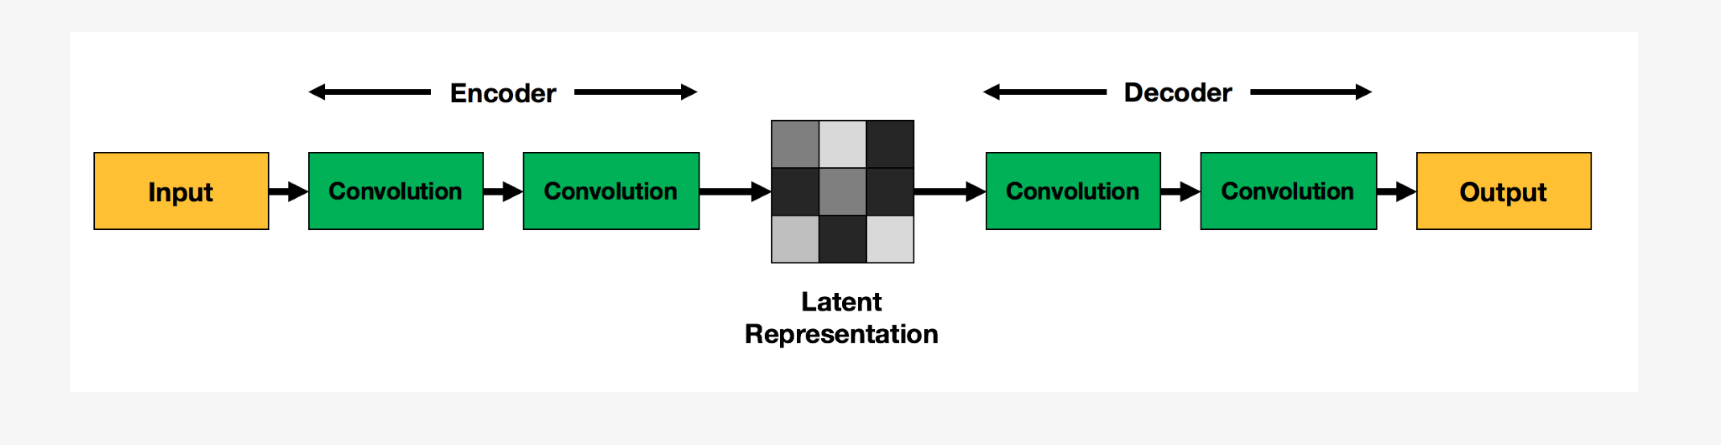

In [37]:
# Define a Convolutional autoencoder network
conv_autoencoder = Sequential()


In [39]:
# Add 2 Convolutional Layers as the Encoder with 3 parameters
# Param1. Number of Filters: Rule 1. decreasing number of filters in the encoder; Rule 2. Increasing number of filters in the decoder.
# Param2. Filter Size
# Param3. Padding

from keras.layers import Conv2D
# Add 16 filters at this Convolutional layer
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same', input_shape=(28,28,1)))
# Add 8 filters at this Convolutional layer
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu',padding='same'))


In [40]:
# Add 2 Convolutional Layers as the Decoder


# Add 8 filters at this Convolutional layer
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Add 16 filters at this Convolutional layer
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))

In [41]:
# Add an output layer to the convolutional autoencoder network

conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [42]:
conv_autoencoder.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 8)         1160      
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 8)         584       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 16)        1168      
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 1)         145       
                                                                 
Total params: 3217 (12.57 KB)
Trainable params: 3217 (12.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Compile and traing the Convolutional Autoencoder network

conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(X_train_noisy.reshape(60000,28,28,1),
                     X_train_reshaped.reshape(60000,28,28,1),
                     epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.1198
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1017
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1002
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0993
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0986
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0982
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0979
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0976
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0974
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0972


In [44]:
# Predict an output

output = conv_autoencoder.predict(X_test_noisy.reshape(10000,28,28,1))


313/313 [==============================] - 1s 4ms/step


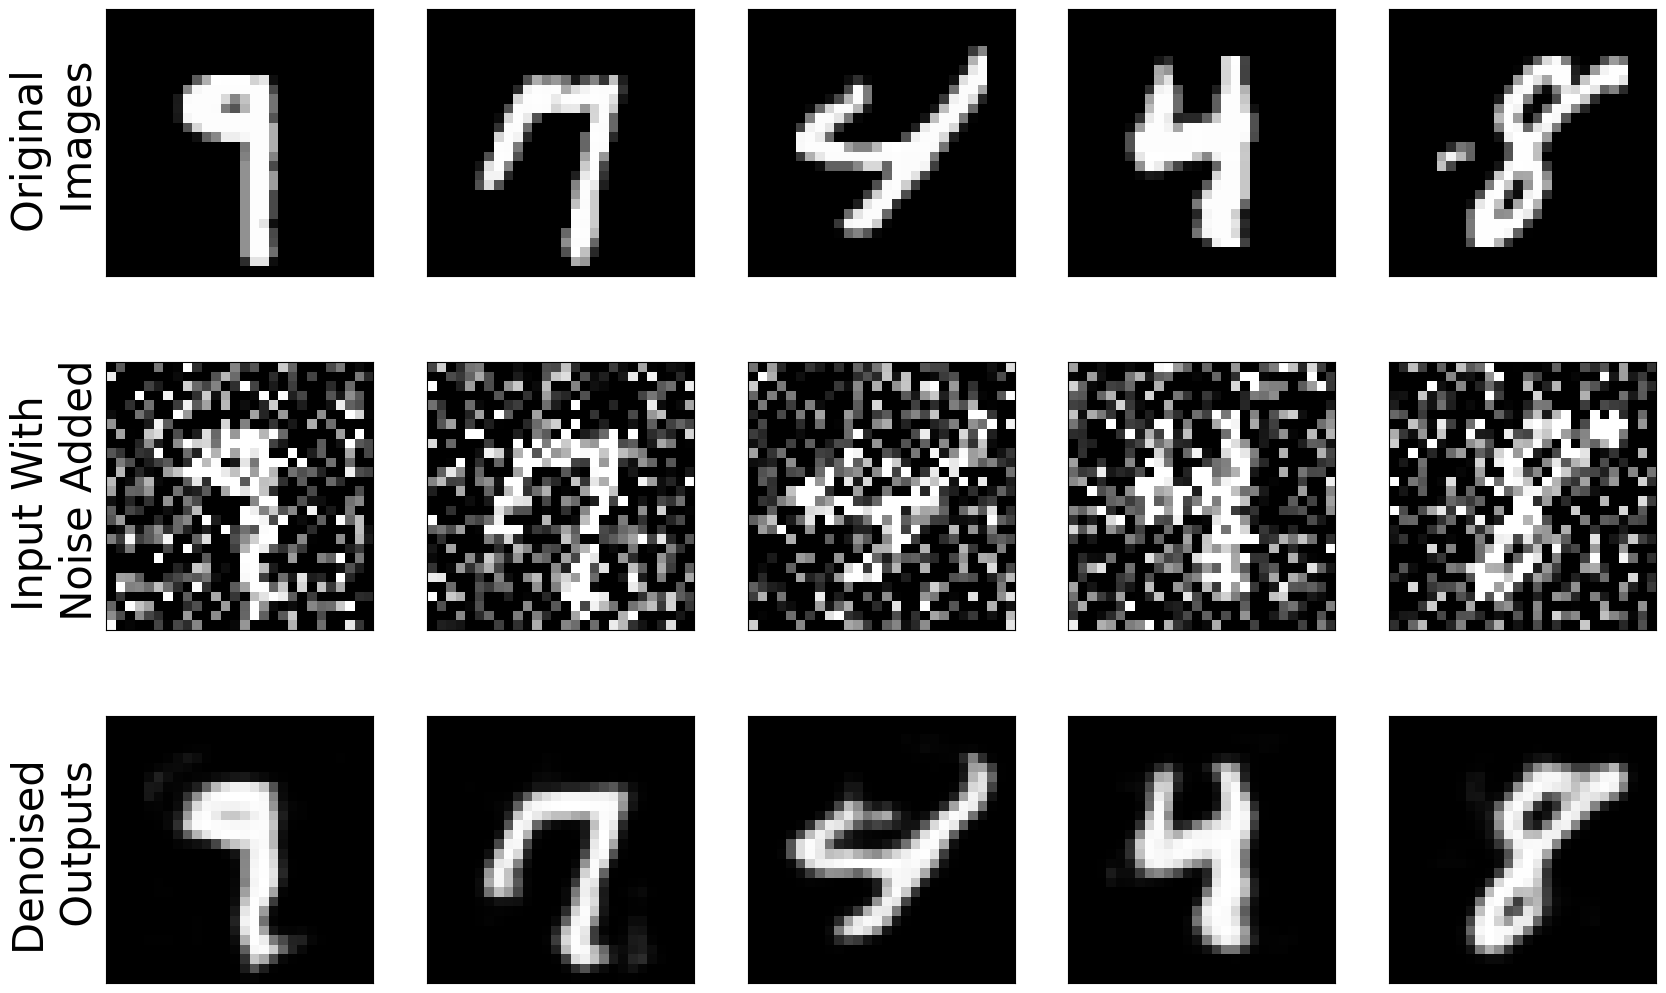

In [45]:
# Plot the outputs from the same autoencoder with original input images and noisy input images
# We are expecting a similar results to the original images.
# that is to say the convolutional autoencoder is generating denoised image from learning noisy input

# Create a grid to show images in 3 x 5 format
fig, ((ax1,ax2,ax3,ax4,ax5), (ax6,ax7,ax8,ax9,ax10), (ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3,5,figsize=(20,13))
# randomly select 5 images
randomly_selected_images = random.sample(range(output.shape[0]),5)

# Display the original images
for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
  ax.imshow(X_test_reshaped[randomly_selected_images[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("Original \n Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# Display the images with added noise
for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
  ax.imshow(X_test_noisy[randomly_selected_images[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("Input With \n Noise Added", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# Display the output images from training the noisy images with autoencoders
for i, ax in enumerate([ax11,ax12,ax13,ax14,ax15]):
  ax.imshow(output[randomly_selected_images[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("Denoised \n Outputs", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])


Using UCI's Noisy Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Kaggle/UCI_Noisy

/content/drive/MyDrive/Kaggle/UCI_Noisy


In [ ]:
# ! unzip noisyoffice.zip

In [59]:
noisy_image_path = "/content/drive/MyDrive/Kaggle/UCI_Noisy/NoisyOffice/SimulatedNoisyOffice/noisy/"
clean_image_path = "/content/drive/MyDrive/Kaggle/UCI_Noisy/NoisyOffice/SimulatedNoisyOffice/clean_images_grayscale/"

In [60]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

X_train_noisy = []

for file in sorted(os.listdir(noisy_image_path)):
    img = load_img(noisy_image_path+file, color_mode='grayscale',
                   target_size=(420,540))
    img = img_to_array(img).astype('float32')/255
    X_train_noisy.append(img)

# convert to numpy array
X_train_noisy = np.array(X_train_noisy)

In [61]:
print(X_train_noisy.shape)
# 216 images
# dimension: 420 x 540 x 1

(54, 420, 540, 1)


In [62]:
X_train_clean = []

for file in sorted(os.listdir(clean_image_path)):
    img = load_img(clean_image_path+file, color_mode='grayscale',
                   target_size=(420,540))
    img = img_to_array(img).astype('float32')/255
    X_train_clean.append(img)

# convert to numpy array
X_train_clean = np.array(X_train_clean)


In [63]:
print(X_train_clean.shape)

(54, 420, 540, 1)


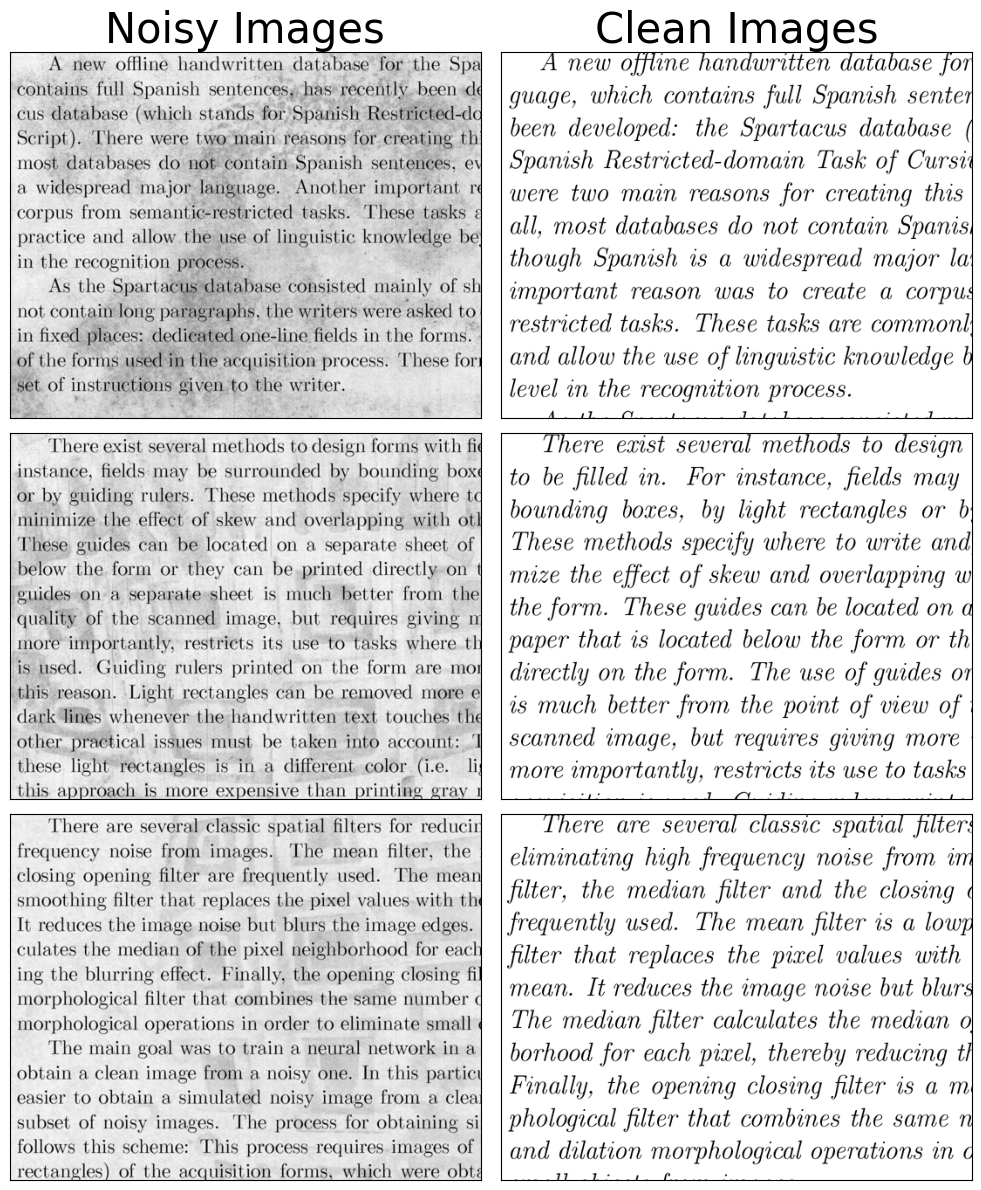

In [64]:
import random
from matplotlib import pyplot as plt


fig, ((ax1,ax2), (ax3,ax4),
      (ax5,ax6)) = plt.subplots(3, 2, figsize=(10,12))

randomly_selected_imgs = random.sample(range(X_train_noisy.shape[0]),3)

# plot noisy images on the left
for i, ax in enumerate([ax1,ax3,ax5]):
    ax.imshow(X_train_noisy[i].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Noisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plot clean images on the right
for i, ax in enumerate([ax2,ax4,ax6]):
    ax.imshow(X_train_clean[i].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Clean Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


In [65]:
# Splitting the dataset into training and testing sets

# use the first 20 noisy images as testing images
X_test_noisy = X_train_noisy[0:26,]
X_train_noisy = X_train_noisy[27:,]

# use the first 20 clean images as testing images
X_test_clean = X_train_clean[0:26,]
X_train_clean = X_train_clean[27:,]

Build a Convolutional Autoencoder network for the UCI dataset

In [66]:
from keras.models import Sequential
# Create a basic convolutional autoencoder network
basic_conv_autoencoder = Sequential()

In [67]:
from keras.layers import Conv2D

# Add a single convolutional layer to the network as an encoder
basic_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', input_shape=(420,540,1)))


In [68]:
# Add a single convolutional layer to the network as a decoder
basic_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))



In [69]:
# Add an output layer
basic_conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [70]:
basic_conv_autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 420, 540, 8)       80        
                                                                 
 conv2d_17 (Conv2D)          (None, 420, 540, 8)       584       
                                                                 
 conv2d_18 (Conv2D)          (None, 420, 540, 1)       73        
                                                                 
Total params: 737 (2.88 KB)
Trainable params: 737 (2.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
print(X_train_noisy.shape)
print(X_train_clean.shape)

(27, 420, 540, 1)
(27, 420, 540, 1)


In [72]:
# Compile and train the network

basic_conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
basic_conv_autoencoder.fit(X_train_noisy, X_train_clean, epochs=10)

Epoch 1/10
1/1 [==============================] - 8s 8s/step - loss: 0.7180
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 0.7131
Epoch 3/10
1/1 [==============================] - 7s 7s/step - loss: 0.7080
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 0.7026
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 0.6959
Epoch 6/10
1/1 [==============================] - 7s 7s/step - loss: 0.6883
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 0.6800
Epoch 8/10
1/1 [==============================] - 5s 5s/step - loss: 0.6710
Epoch 9/10
1/1 [==============================] - 7s 7s/step - loss: 0.6615
Epoch 10/10
1/1 [==============================] - 5s 5s/step - loss: 0.6515


In [74]:
output = basic_conv_autoencoder.predict(X_test_noisy)

1/1 [==============================] - 1s 1s/step


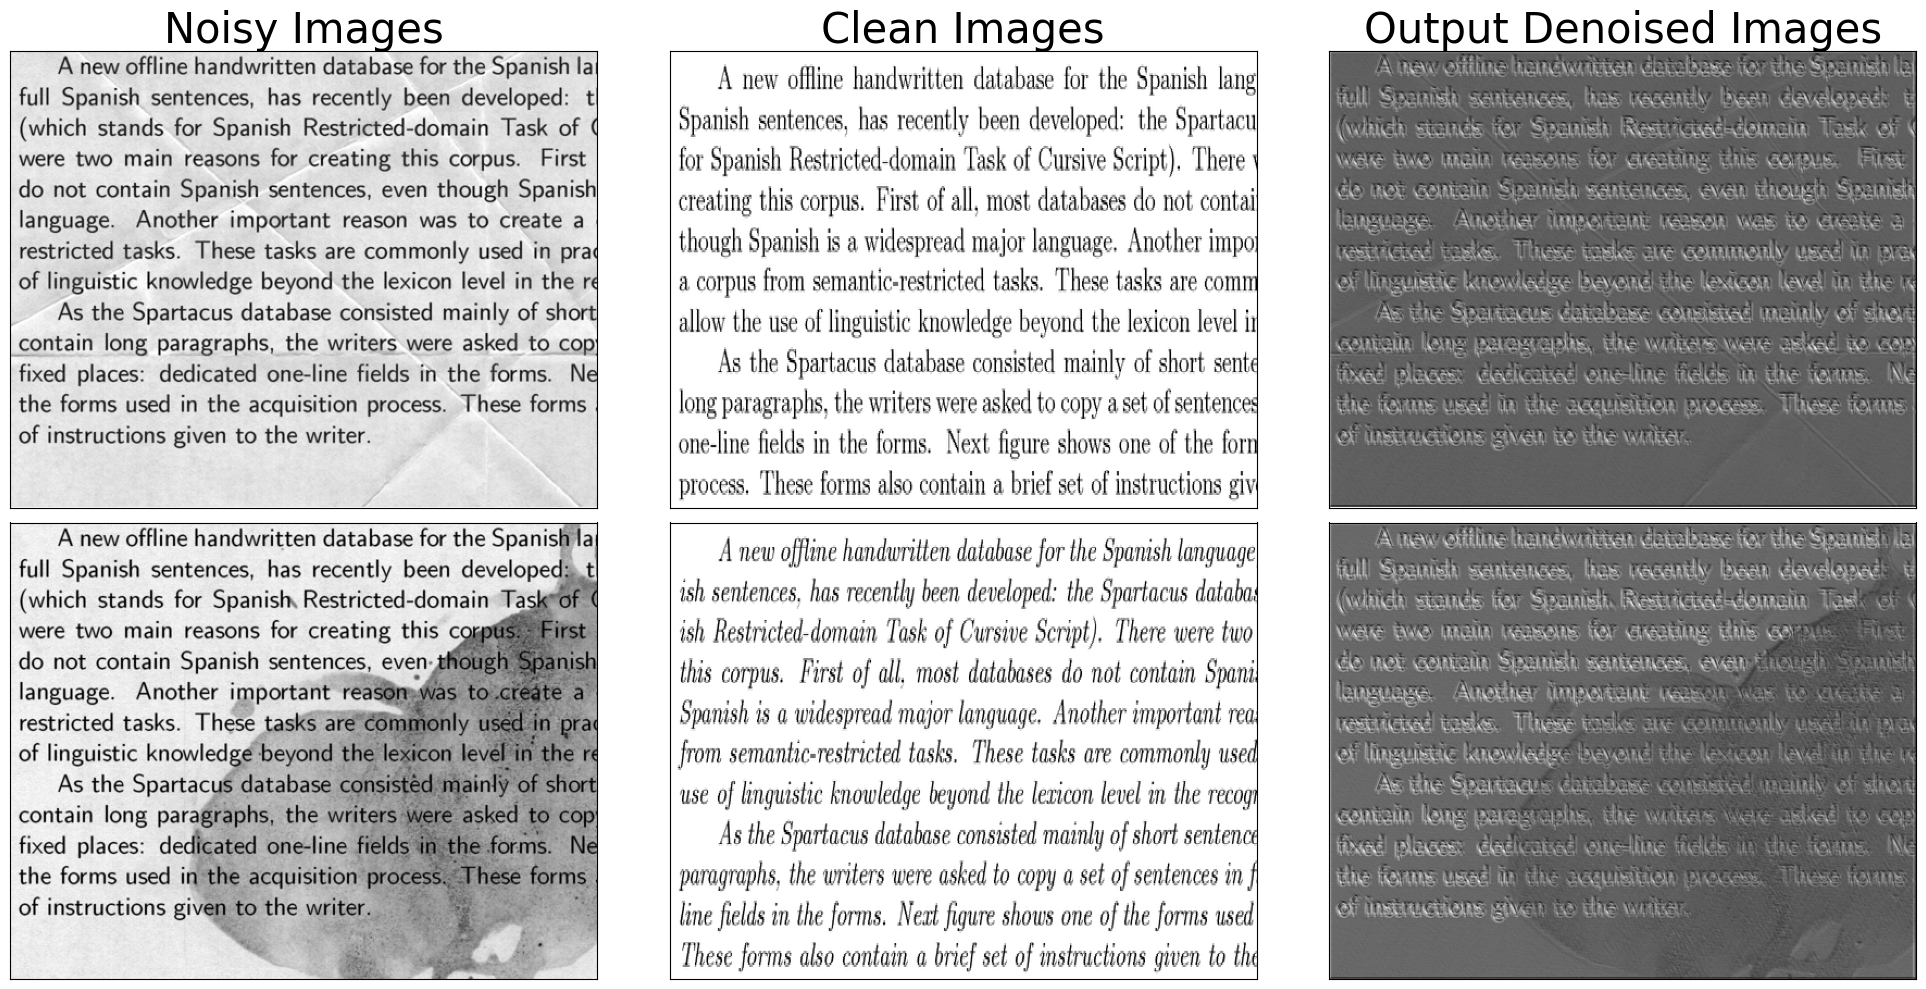

In [75]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))

randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]),2)

for i, ax in enumerate([ax1, ax4]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_noisy[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Noisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_clean[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Clean Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
    idx = randomly_selected_imgs[i]
    ax.imshow(output[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Output Denoised Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [76]:
# The basic autoencoder makes a grayish denoised ouput image
# We can build a deep convolutional autoencoder to improve its performance.

# Define a sequential class
deep_conv_autoencoder = Sequential()


# from keras.layers import Conv2D

# Add a single convolutional layer to the network as an encoder
deep_conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(420,540,1)))
deep_conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
deep_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))


# Add a single convolutional layer to the network as a decoder
deep_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
deep_conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
deep_conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

# Add an output layer
deep_conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))
deep_conv_autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 420, 540, 32)      320       
                                                                 
 conv2d_20 (Conv2D)          (None, 420, 540, 16)      4624      
                                                                 
 conv2d_21 (Conv2D)          (None, 420, 540, 8)       1160      
                                                                 
 conv2d_22 (Conv2D)          (None, 420, 540, 8)       584       
                                                                 
 conv2d_23 (Conv2D)          (None, 420, 540, 16)      1168      
                                                                 
 conv2d_24 (Conv2D)          (None, 420, 540, 32)      4640      
                                                                 
 conv2d_25 (Conv2D)          (None, 420, 540, 1)      

In [77]:
# Compile and Train the deep conv autoencoder network

deep_conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
deep_conv_autoencoder.fit(X_train_noisy, X_train_clean, epochs=10)

output = deep_conv_autoencoder.predict(X_test_noisy)

Epoch 1/10
1/1 [==============================] - 40s 40s/step - loss: 0.7056
Epoch 2/10
1/1 [==============================] - 33s 33s/step - loss: 0.6916
Epoch 3/10
1/1 [==============================] - 32s 32s/step - loss: 0.6820
Epoch 4/10
1/1 [==============================] - 31s 31s/step - loss: 0.6713
Epoch 5/10
1/1 [==============================] - 30s 30s/step - loss: 0.6557
Epoch 6/10
1/1 [==============================] - 30s 30s/step - loss: 0.6349
Epoch 7/10
1/1 [==============================] - 30s 30s/step - loss: 0.6100
Epoch 8/10
1/1 [==============================] - 33s 33s/step - loss: 0.5809
Epoch 9/10
1/1 [==============================] - 34s 34s/step - loss: 0.5470
Epoch 10/10
1/1 [==============================] - 7s 7s/step


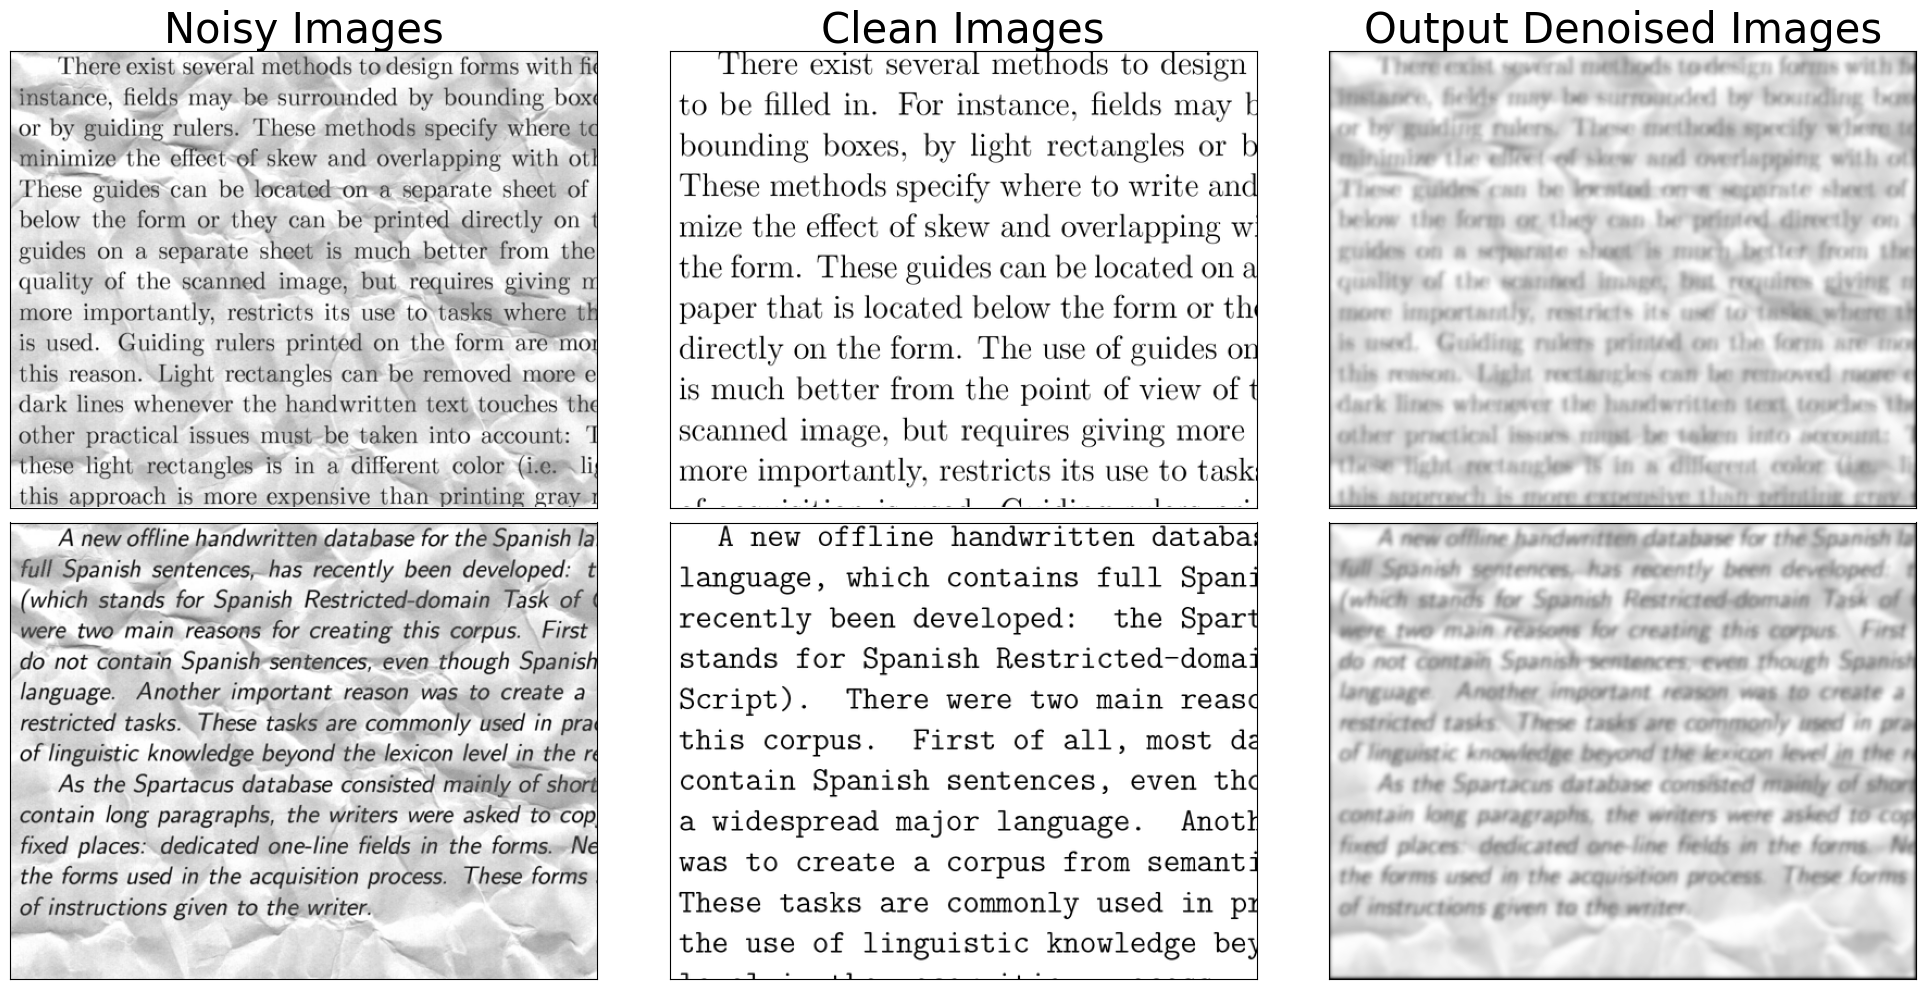

In [78]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))

randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]),2)

for i, ax in enumerate([ax1, ax4]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_noisy[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Noisy Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_clean[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Clean Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
    idx = randomly_selected_imgs[i]
    ax.imshow(output[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Output Denoised Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()